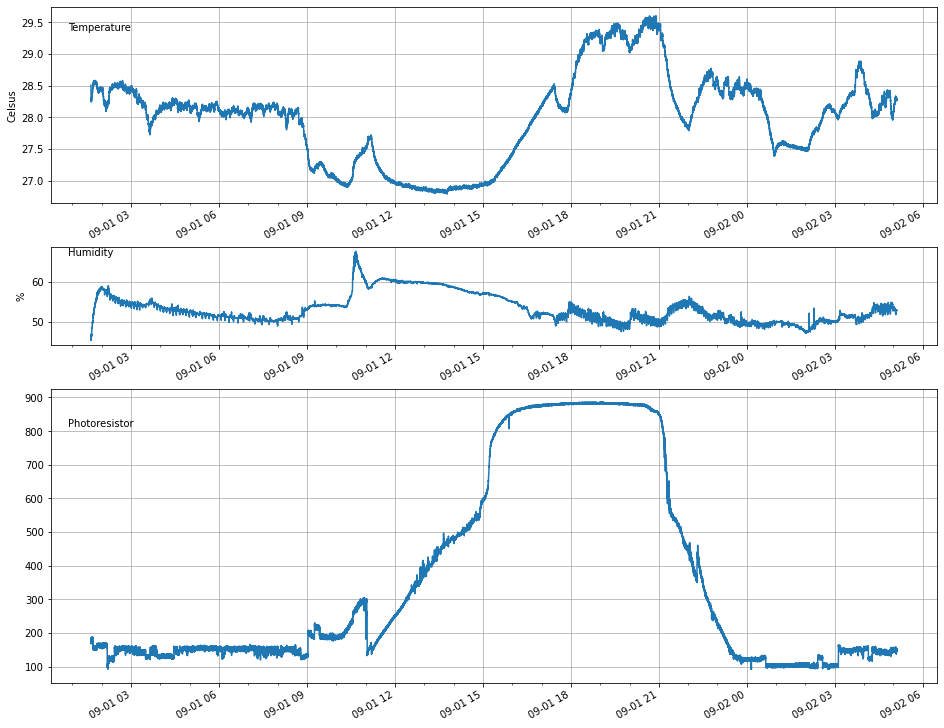

In [1]:
import sqlite3, pandas as pd, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib.cbook as cbook
 
#new_db = f'log/SHT40.{datetime.datetime.fromtimestamp(time.time()).strftime("%Y-%m-%dT%H:%M:%S")}.db' 
new_db = '/home/a/SHT40.2022-09-01T02_37_40.db'
con = sqlite3.connect(new_db)    
df = pd.read_sql('select * from log', con, parse_dates=['timestamp'])#

fig, axes = plt.subplots(3, 1, figsize=(13, 10), constrained_layout=True,gridspec_kw={'height_ratios': [2, 1, 3]})

for type_, unit_, ax in zip(['Temperature','Humidity','Photoresistor'], ['Celsus','%',''], axes):
    ax.plot('timestamp', type_, data=df.to_records()) 
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=(0,3,6,9,12,15,18,21)))
    ax.xaxis.set_minor_locator(mdates.HourLocator())
    ax.grid(True)
    ax.set_ylabel(unit_) 
    ax.set_title(type_, loc='left', y=0.85, x=0.02, fontsize='medium') 
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right') 
plt.show()